In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import yaml
import numpy as np

In [28]:
path = "../output/evaluate.txt"
with open(path, 'r') as f:
    result = yaml.full_load(f)

In [36]:
def plot_step_performances(result):
    plt.figure(figsize=(20,14), dpi= 160)
    fig, ax = plt.subplots()
    ax.set_xlabel('number of points')
    ax.set_ylabel('[flops/cycle]', loc = 'top', rotation="horizontal")
    ax.grid(axis="y", color='white')
    ax.set_facecolor(color='gainsboro')
    ax.set_title('Performance of evaluate surrogate function on Intel i7-7560 CPU, 2.40GHz\nCompiler: GCC 9.4.0\nFlags:-march=native\n', loc='left', fontweight="bold")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    handles = []
    for i in range(len(result['evaluate_func_name'])):
        cycles = result['evaluate_func_cycles'][i]
        flops = result['evaluate_func_flops'][i]
        performance = [w/t for t, w in zip(cycles, flops)]
        x_list = np.arange(0, len(performance), 1)
        p, = ax.plot(x_list, performance, marker = "o", markersize= 3, label = result['evaluate_func_name'][i])
        handles.append(p)
    
    plt.legend(handles=handles, title='legend', bbox_to_anchor=(1.05, 1), loc='upper left')

<Figure size 3200x2240 with 0 Axes>

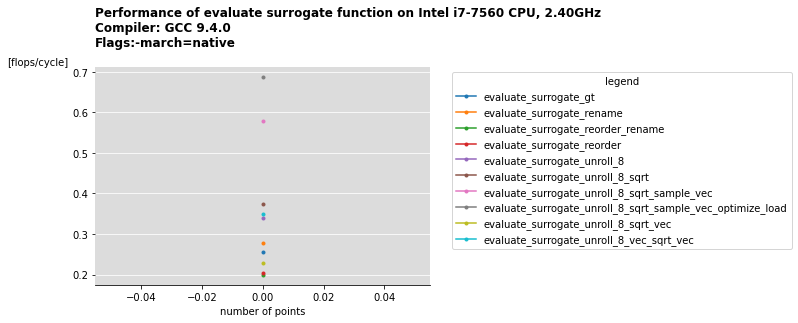

In [37]:
plot_step_performances(result)